In [6]:

import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import numpy as np
from opencage.geocoder import OpenCageGeocode
import pandas as pd
import seaborn as sns
import spacy
import time

# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)






In [ ]:

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from opencage.geocoder import OpenCageGeocode
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sketch
from shapely.geometry import Point
import time
import re
import folium
from folium.plugins import MarkerCluster, HeatMap
from IPython.display import display
from folium.plugins import TimestampedGeoJson#muestra datos geoespacioales a lo largo del tiempo
import plotly.graph_objects as go
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.ticker import MaxNLocator

In [3]:
df_lugar_destino= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_destino.xlsx")

In [4]:
df_lugar_destino

,Ubicacion,Coordenadas,Latitud,Longitud
0,"Republica autonoma de Crimea, Ucrania","{'lat': 45.6856952, 'lng': 33.9329411}",45.685695,33.932941
1,"Shabwah, Yemen","{'lat': 14.9274109, 'lng': 46.6084967}",14.927411,46.608497
2,Ucrania,"{'lat': 49.4871968, 'lng': 31.2718321}",49.487197,31.271832
3,"Provincia Oriental, Arabia Saudita","{'lat': 23.3036077, 'lng': 50.1258804}",23.303608,50.125880
4,"blast de Rivne, 35360, Ucrania","{'lat': 51.0, 'lng': 26.5}",51.000000,26.500000
...,...,...,...,...
115,"blast de Rivne, 35708, Ucrania","{'lat': 51.0, 'lng': 26.5}",51.000000,26.500000
116,"blast de Smolensk, Distrito federal Central, R...","{'lat': 60.0, 'lng': 100.0}",60.000000,100.000000
117,"Jariiban, Mudug, Galmudug , Somalia","{'lat': 7.2128199, 'lng': 48.8498632}",7.212820,48.849863
118,"Loiyangalani ward, Condado de Marsabit, Easter...","{'lat': 2.9318846, 'lng': 36.7372475}",2.931885,36.737248


In [5]:
df_lugar_destino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ubicacion    120 non-null    object 
 1   Coordenadas  118 non-null    object 
 2   Latitud      118 non-null    float64
 3   Longitud     118 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.9+ KB


# IPS DESTINO

In [8]:
#uso la biblioteca opencage con si api personal

# Coloca tu clave de API de OpenCage aquí
API_KEY_OPENCAGE = '15a76686df464312a351a28d89f39a6d'

geolocator_opencage = OpenCageGeocode(API_KEY_OPENCAGE)

def obtener_coordenadas_opencage(ubicacion):
    try:
        result = geolocator_opencage.geocode(ubicacion)
        if result and 'geometry' in result[0]:
            return result[0]['geometry']
        else:
            return None
    except Exception as e:
        print(f"No se pudo obtener coordenadas para {ubicacion}. Error: {e}")
        return None

# Aplica la función para obtener coordenadas usando OpenCage Geocoding API
df_lugar_destino['Coordenadas'] = df_lugar_destino['Ubicacion'].apply(obtener_coordenadas_opencage)
df_lugar_destino['Latitud'] = df_lugar_destino['Coordenadas'].apply(lambda x: x['lat'] if x else None)
df_lugar_destino['Longitud'] = df_lugar_destino['Coordenadas'].apply(lambda x: x['lng'] if x else None)


#MAPA DE CALOR IPS DESTINO FILTRADAS, SIN MAR NI ILOCALIZABLES 


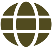
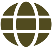
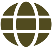
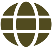
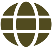
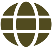
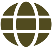
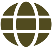
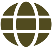
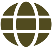
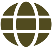
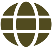
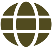
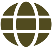
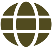
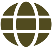
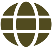
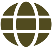
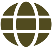
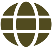
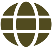
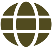
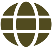
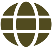
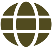
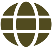
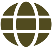
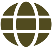
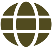
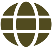
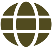
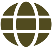
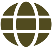
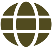
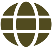
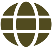
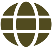
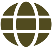
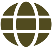
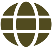
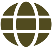
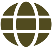
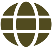
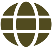
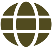
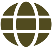
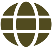
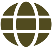
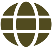
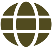
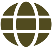
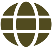
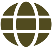
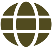
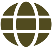
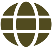
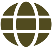
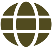
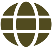
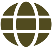
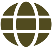
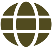
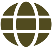
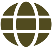
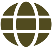
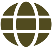
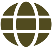
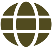
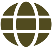
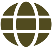
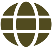
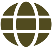
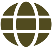
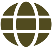
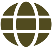
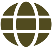
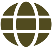
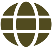
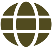
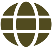
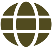
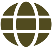
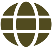
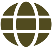
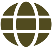
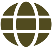
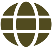
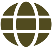
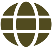
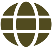
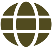
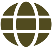
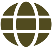
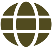
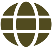
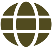
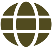
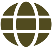
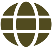
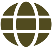
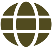
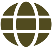
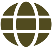
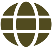
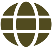
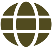
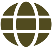
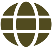
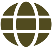
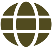
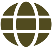
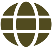
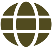
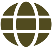
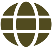
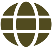
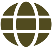
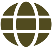

In [12]:
# Filtrar filas que no contengan NaN en 'Latitud' y 'Longitud'
df_filtered = df_lugar_destino[['Latitud', 'Longitud']].dropna()

# Crear el mapa
mapa = folium.Map(location=[0, 0], zoom_start=2)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con iconos personalizados
for _, col in df_filtered.iterrows():
    icono_personalizado = folium.CustomIcon(icon_image=r'C:\Users\victo\Pictures\internet_icon.png', icon_size=(30, 30))
    folium.Marker(location=[col['Latitud'], col['Longitud']], icon=icono_personalizado).add_to(marker_cluster)

# Agregar un mapa de calor
HeatMap(data=df_filtered[['Latitud', 'Longitud']].values.tolist()).add_to(mapa)

# Guardar el mapa como un archivo HTML
#mapa.save(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\MAPAS\mapa_geolocalizado_ips_destino_final.html")

mapa

#MAPA  IPS DESTINO FILTRADAS, SIN MAR NI ILOCALIZABLES 


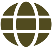
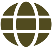
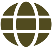
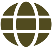
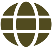
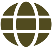
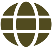
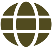
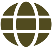
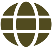
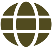
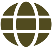
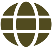
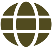
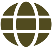
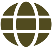
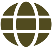
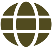
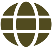
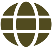
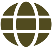
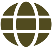
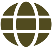
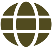
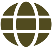
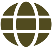
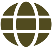
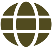
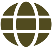
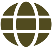
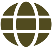
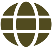
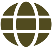
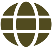
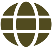
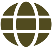
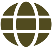
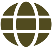
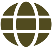
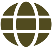
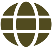
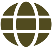
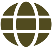
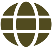
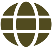
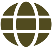
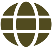
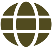
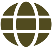
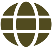
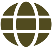
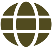
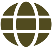
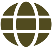
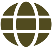
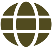
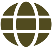
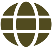
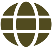
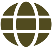
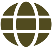
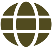
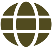
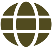
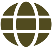
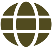
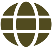
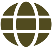
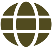
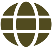
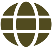
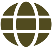
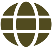
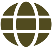
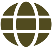
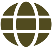
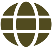
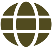
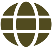
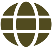
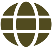
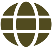
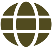
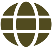
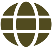
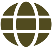
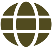
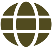
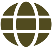
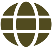
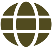
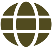
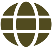
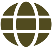
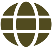
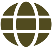
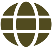
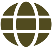
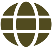
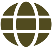
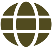
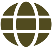
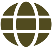
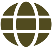
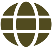
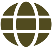
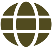
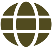
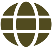
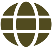
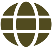
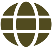
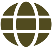
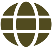
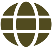
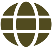
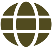
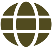

In [11]:
# Filtrar filas que no contengan NaN en 'Latitud' y 'Longitud'
df_filtered = df_lugar_destino[['Latitud', 'Longitud']].dropna()

# Crear el mapa
mapa = folium.Map(location=[0, 0], zoom_start=2)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con iconos personalizados
for _, col in df_filtered.iterrows():
    icono_personalizado = folium.CustomIcon(icon_image=r'C:\Users\victo\Pictures\internet_icon.png', icon_size=(30, 30))
    folium.Marker(location=[col['Latitud'], col['Longitud']], icon=icono_personalizado).add_to(marker_cluster)


# Guardar el mapa como un archivo HTML
#mapa.save(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\MAPAS\mapa_geolocalizado_ips_destino_final.html")

mapa

# PARA LA PRESENTACION

In [37]:
df_antiguedad=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\EXCEL\tabla_guerras_antiguedad.xlsx")

In [40]:
df_antiguedad

,Años,Nombre de la guerra,Resultado
0,4.300 a.C.,Primera guerra registrada,Victoria de los Acadios
1,1.250 a.C.,Batalla de Qadesh,Victoria táctica egipcia
2,490 a.C.,Batalla de Maratón,Victoria griega
3,218 a.C.,Segunda Guerra Púnica,Victoria romana
4,1066 d.C.,Batalla de Hastings,Victoria normanda
5,1519-1521,Conquista de México,Victoria española
6,1756-1763,Guerra de los Siete Años,Victoria británica
7,1775-1783,Guerra de Independencia,Victoria estadounidense
8,1803-1815,Guerras Napoleónicas,Derrota de Francia
9,1861-1865,Guerra Civil EEEUU,Victoria EEUU del Norte


In [39]:
df_antiguedad.drop(columns="Nacionalidad", inplace=True)

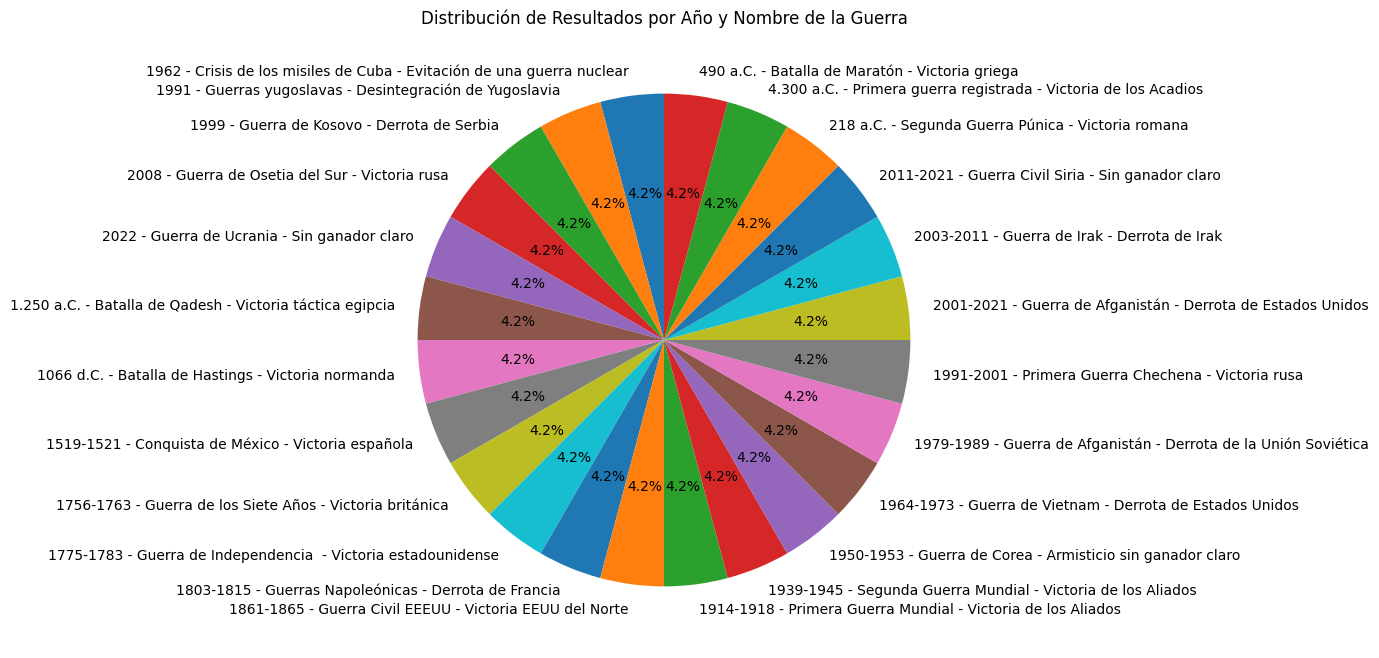

In [41]:
# Contar la frecuencia de combinaciones de categorías
counts = df_antiguedad.groupby(['Años', 'Nombre de la guerra', 'Resultado']).size().reset_index(name='Frecuencia')

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(counts['Frecuencia'], labels=counts['Años'].astype(str) + ' - ' + counts['Nombre de la guerra'] + ' - ' + counts['Resultado'],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Resultados por Año y Nombre de la Guerra')
plt.show()

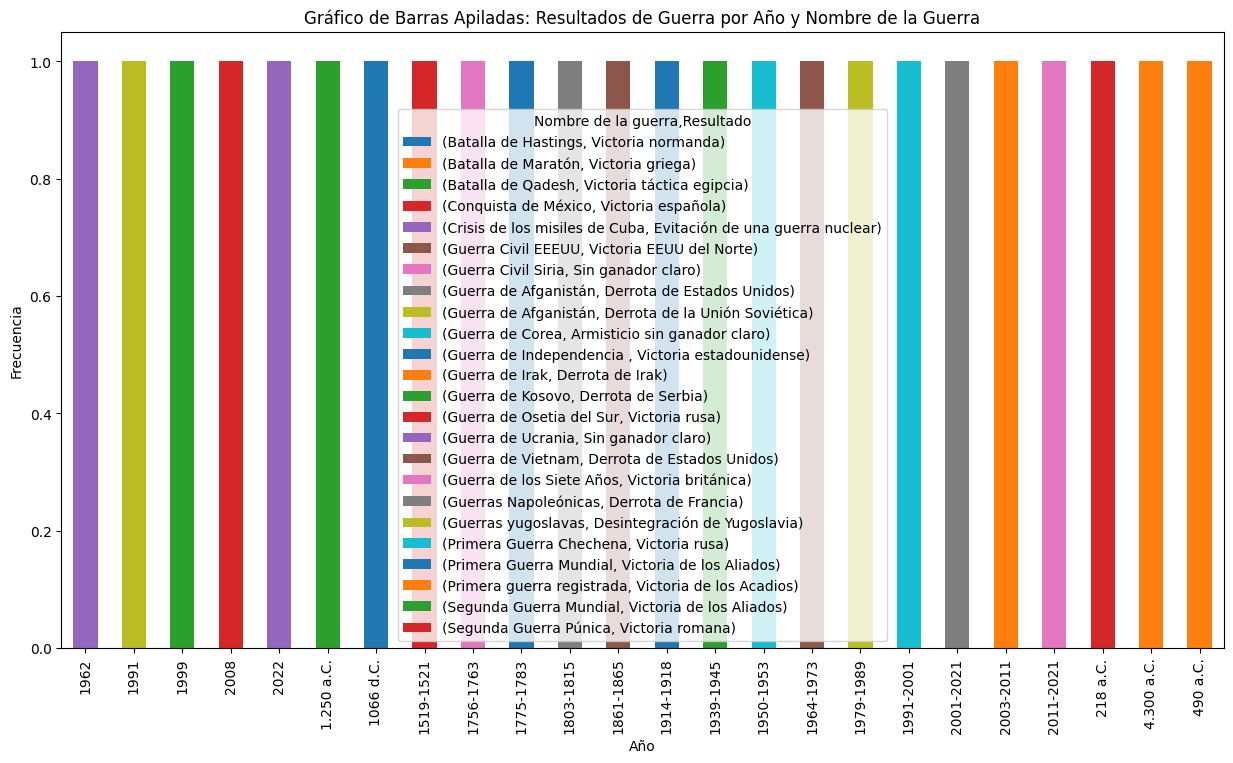

In [55]:
# Contar las ocurrencias de cada combinación
count_table = pd.crosstab(index=df_antiguedad['Años'], columns=[df_antiguedad['Nombre de la guerra'], df_antiguedad['Resultado']], margins=True)

# Crear un gráfico de barras apiladas
count_table.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Gráfico de Barras Apiladas: Resultados de Guerra por Año y Nombre de la Guerra')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

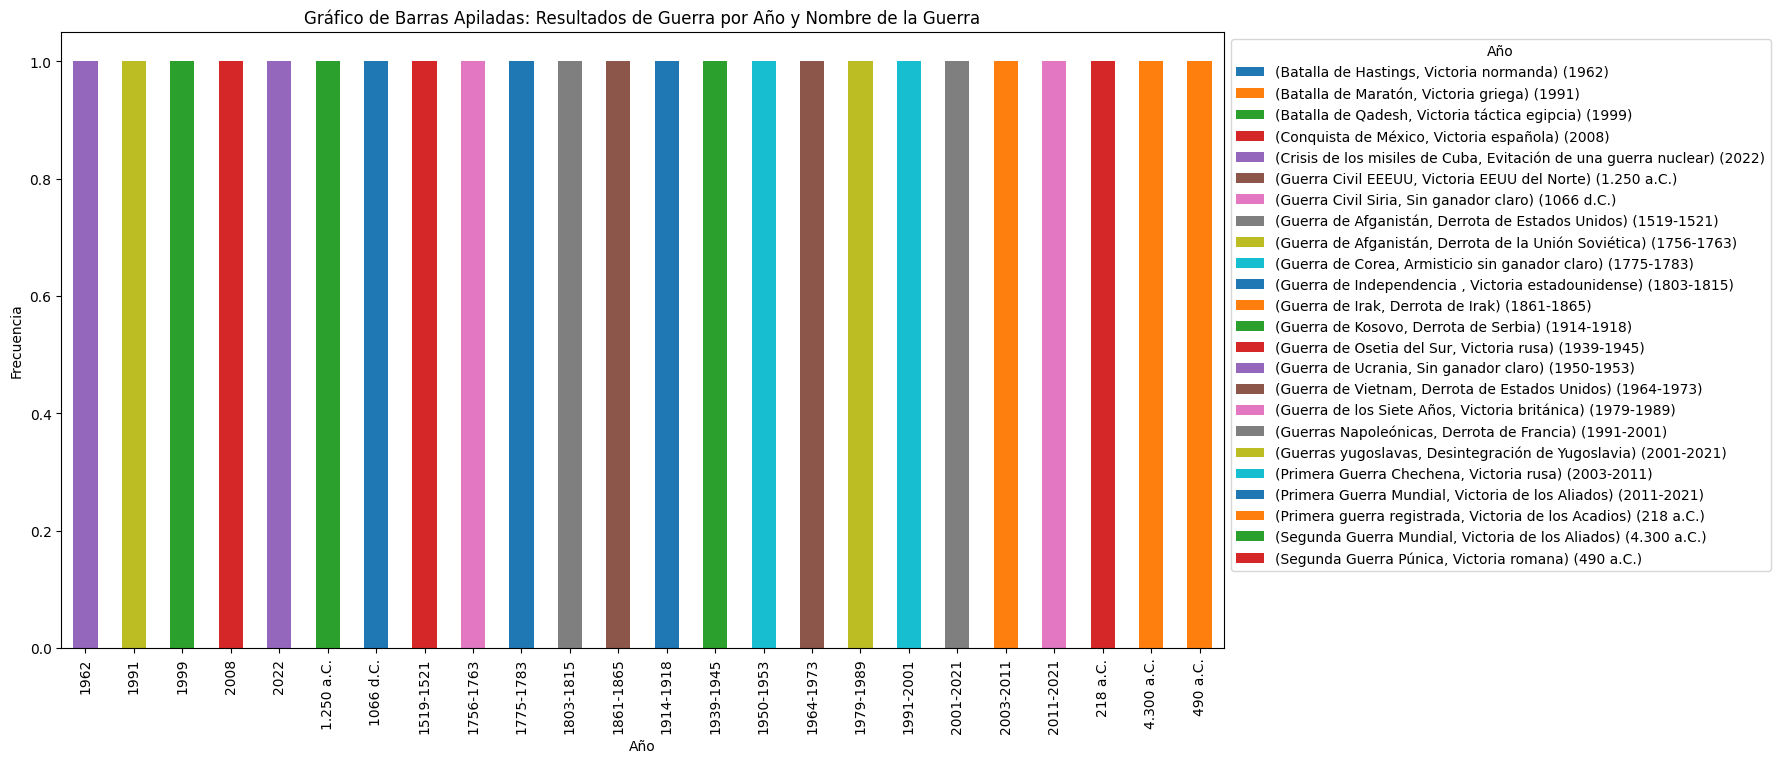

In [56]:
# Contar las ocurrencias de cada combinación
count_table = pd.crosstab(index=df_antiguedad['Años'], columns=[df_antiguedad['Nombre de la guerra'], df_antiguedad['Resultado']], margins=True)

# Crear un gráfico de barras apiladas
ax = count_table.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(15, 8))

# Agregar el año a la leyenda
handles, labels = ax.get_legend_handles_labels()
labels = [f"{label[0]} ({label[1]})" for label in zip(labels, count_table.index)]
ax.legend(handles, labels, title='Año', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Gráfico de Barras Apiladas: Resultados de Guerra por Año y Nombre de la Guerra')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()